# Phase-average empirical ventilator pressure profiles

Dr Daniel Duke<br>
Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)<br>
Department of Mechanical & Aerospace Engineering<br>
Monash University<br>

31st March 2020

In [2]:
# Import modules
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib notebook

In [44]:
# Raw data from Andrew
pressure_control_data = np.array([
    (3668218645.32534 , 4.20890559791587 ),
    (3668218645.44701 , 3.94028058554977 ),
    (3668218645.54894 , 12.34649990312760 ),
    (3668218645.64865 , 19.23370417184200 ),
    (3668218645.78011 , 24.05324308970010 ),
    (3668218645.98287 , 22.49581198161470 ),
    (3668218646.09956 , 21.92713934462520 ),
    (3668218646.29072 , 21.62287649186330 ),
    (3668218646.42337 , 20.97641373006630 ),
    (3668218646.60688 , 20.97210270096550 ),
    (3668218646.82129 , 13.51977041922510 ),
    (3668218646.92401 , 3.40580877941102 ),
    (3668218647.06673 , 3.00047624460422 ),
    (3668218647.16736 , 4.05437915539369 ),
    (3668218647.32294 , 2.66574878618121 ),
    (3668218647.42290 , 3.85051537980326 ),
    (3668218647.52340 , 3.53207403118722 ),
    (3668218647.62346 , 3.77215045108460 ),
    (3668218647.72309 , 4.07938312413171 ),
    (3668218647.85550 , 3.85789202968590 ),
    (3668218647.95528 , 3.94449581392109 ),
    (3668218648.05525 , 4.04115866613574 ),
    (3668218648.15492 , 4.17125594383106 ),
    (3668218648.25466 , 4.24128621630371 ),
    (3668218648.35545 , 4.03943425440229 ),
    (3668218648.45510 , 4.49803194869310 ),
    (3668218648.55484 , 3.99201293452643 ),
    (3668218648.65632 , 4.08771778037772 ),
    (3668218648.75740 , 3.80462687020190 ),
    (3668218648.94158 , 4.12469682982191 ),
    (3668218649.06127 , 3.89209286030382 ),
    (3668218649.16096 , 4.19808012479916 ),
    (3668218649.30261 , 8.79162531811744 ),
    (3668218649.41028 , 16.92327998322430 ),
    (3668218649.51001 , 22.59621105901900 ),
    (3668218649.60996 , 25.36053871014160 ),
    (3668218649.71047 , 22.95747529645450 ),
    (3668218649.81047 , 22.30306108109650 ),
    (3668218649.96407 , 21.63140274933540 ),
    (3668218650.06376 , 21.70660625677560 ),
    (3668218650.16547 , 21.21371193113740 ),
    (3668218650.26629 , 20.94594912440520 ),
    (3668218650.36571 , 20.99509485601450 ),
    (3668218650.46566 , 21.05113823432480 ),
    (3668218650.56620 , 5.69870144966990 ),
    (3668218650.67688 , 3.68564246734604 ),
    (3668218650.80750 , 3.00890670134686 ),
    (3668218650.92718 , 3.01321773044765 ),
    (3668218651.02698 , 2.90390919288620 ),
    (3668218651.12764 , 3.73833282291889 ),
    (3668218651.22762 , 3.89803250040859 ),
    (3668218651.37699 , 3.96317693986930 ),
    (3668218651.49564 , 3.57231030263938 ),
    (3668218651.66124 , 3.84093531523831 ),
    (3668218651.76192 , 3.71878949110396 ),
    (3668218651.86267 , 4.14356955699623 ),
    (3668218651.96262 , 4.19357749447227 ),
    (3668218652.06335 , 4.12364302272908 ),
    (3668218652.16307 , 4.09499862929806 ),
    (3668218652.26280 , 4.17365095997229 ),
    (3668218652.36254 , 4.22614971431904 ),
    (3668218652.46302 , 4.17891999566928 ),
    (3668218652.56300 , 4.12690024473704 ),
    (3668218652.70242 , 4.11636217357591 ),
    (3668218652.84526 , 4.01519669103436 ),
    (3668218652.98561 , 3.98626489564776 ),
    (3668218653.08645 , 13.69029556983150 ),
    (3668218653.25689 , 24.40291544911450 ),
    (3668218653.40448 , 24.45646801032130 ),
    (3668218653.50443 , 22.38238401641140 ),
    (3668218653.60518 , 21.97666827891950 ),
    (3668218653.70481 , 21.61387123097670 ),
    (3668218653.80463 , 21.16399139561690 ),
    (3668218653.90636 , 21.20604787953200 ),
    (3668218654.00608 , 21.10507399821650 ),
    (3668218654.10683 , 21.12844935595060 ),
    (3668218654.20655 , 20.98158696503380 ),
    (3668218654.34693 , 4.22892793291248 ),
    (3668218654.44670 , 3.10930577875115 ),
    (3668218654.54643 , 3.00814029620960 ),
    (3668218654.64815 , 3.92217426327989 ),
    (3668218654.74789 , 2.40756604401395 ),
    (3668218654.84768 , 3.07721256231889 ),
    (3668218654.94746 , 3.80788409220986 ),
    (3668218655.06398 , 3.69905455783010 ),
    (3668218655.16381 , 3.62021062592976 ),
    (3668218655.26357 , 3.61657020146959 ),
    (3668218655.36417 , 4.23285575956106 ),
    (3668218655.46490 , 4.49285871372558 ),
    (3668218655.56473 , 4.31591491983272 ),
    (3668218655.66437 , 3.96710476651788 ),
    (3668218655.76608 , 3.71859788987786 ),
    (3668218655.86582 , 4.13322308729403 ),
    (3668218655.96578 , 3.99182133330032 ),
    (3668218656.06535 , 4.02008252381347 ),
    (3668218656.16624 , 3.55008455272764 ),
    (3668218656.28277 , 3.94277140218765 ),
    (3668218656.38242 , 4.12096060463227 ),
    (3668218656.48318 , 4.27654085424729 ),
    (3668218656.58404 , 3.88404560601339 ),
    (3668218656.68385 , 3.67031436390243 ),
    (3668218656.78357 , 8.93312287260778 ),
    (3668218656.89204 , 17.82265645125880 ),
    (3668218656.99277 , 23.30053741112350 ),
    (3668218657.09350 , 25.20802408107560 ),
    (3668218657.20718 , 22.82507880311460 ),
    (3668218657.38573 , 22.18034045305100 ),
    (3668218657.48559 , 21.41000745561910 ),
    (3668218657.58617 , 21.29159785667430 ),
    (3668218657.68714 , 21.43434081971650 ),
    (3668218657.78662 , 21.21160431695170 ),
    (3668218657.88759 , 20.82006707508120 ),
    (3668218657.99429 , 20.41636315127830 ),
    (3668218658.09504 , 5.38390052574687 ),
    (3668218658.19851 , 3.59022502368316 ),
    (3668218658.32133 , 3.00239225756377 ),
    (3668218658.42215 , 3.97860084404238 ),
    (3668218658.52168 , 3.02902483707294 ),
    (3668218658.65627 , 3.47919207438827 ),
    (3668218658.75803 , 3.66312931547873 ),
    (3668218658.85775 , 3.80865049734712 ),
    (3668218658.95746 , 3.53399004414678 ),
    (3668218659.05922 , 4.24435183708556 ),
    (3668218659.15892 , 4.30384403839707 ),
    (3668218659.25869 , 3.87293273117393 ),
    (3668218659.35849 , 4.26590698258951 ),
    (3668218659.45913 , 4.45999909215607 ),
    (3668218659.55883 , 4.09566923393868 ),
    (3668218659.65880 , 4.66223425650969 ),
    (3668218659.75829 , 4.07603010139428 ),
    (3668218659.88603 , 4.13389369170181 ),
    (3668218659.98667 , 4.28152248798870 ),
    (3668218660.08666 , 3.87034611357376 ),
    (3668218660.18716 , 3.76975543494336 ),
    (3668218660.28689 , 3.61829461297020 ),
    (3668218660.42661 , 3.30473909736611 ),
    (3668218660.52645 , 4.51891648955643 ),
    (3668218660.62817 , 14.95131947821940 ),
    (3668218660.72767 , 21.65544871147720 ),
    (3668218660.82839 , 24.89523497084160 ),
    (3668218660.93413 , 23.92898965138010 ),
    (3668218661.03387 , 22.35527243348770 ),
    (3668218661.13461 , 21.86438992130570 ),
    (3668218661.23529 , 21.79301843978460 ),
    (3668218661.33602 , 21.36957958270800 ),
    (3668218661.43598 , 21.26678548916240 ),
    (3668218661.53648 , 20.96367224399000 ),
])

volume_control_data = np.array([
    (3668223654.10509 , 3.65278284577653 ),
    (3668223654.20483 , 3.48800573404878 ),
    (3668223654.30646 , 11.34011411294340 ),
    (3668223654.40707 , 14.20100881578400 ),
    (3668223654.50680 , 15.98309243959370 ),
    (3668223654.60765 , 17.15799156669530 ),
    (3668223654.70823 , 18.29179221671070 ),
    (3668223654.80809 , 19.07160947821100 ),
    (3668223654.95960 , 20.43878050264900 ),
    (3668223655.08622 , 20.55163366394120 ),
    (3668223655.18600 , 21.08993749599900 ),
    (3668223655.28569 , 21.10267898207530 ),
    (3668223655.38646 , 20.75741345249120 ),
    (3668223655.48621 , 6.20692387875170 ),
    (3668223655.58588 , 3.83863609959371 ),
    (3668223655.68565 , 3.06849470338784 ),
    (3668223655.78635 , 2.57751639070921 ),
    (3668223655.88613 , 3.86584348324686 ),
    (3668223655.98683 , 4.12182281026617 ),
    (3668223656.08654 , 2.56640351586975 ),
    (3668223656.18731 , 2.96033577364869 ),
    (3668223656.28701 , 3.77598247700371 ),
    (3668223656.41694 , 3.23346341657452 ),
    (3668223656.51660 , 3.55362917669117 ),
    (3668223656.61727 , 3.15816410840489 ),
    (3668223656.71685 , 3.69273171527311 ),
    (3668223656.81659 , 3.78671214939095 ),
    (3668223656.91736 , 3.51090208836831 ),
    (3668223657.01837 , 3.40331796254031 ),
    (3668223657.14986 , 3.62116863229312 ),
    (3668223657.25142 , 3.47660545702092 ),
    (3668223657.35216 , 3.38722345395945 ),
    (3668223657.45289 , 3.49126295582391 ),
    (3668223657.55271 , 3.54989295150153 ),
    (3668223657.65340 , 3.47248602914624 ),
    (3668223657.75309 , 3.62442585430108 ),
    (3668223657.85287 , 3.34622077737004 ),
    (3668223657.95279 , 3.35436383215711 ),
    (3668223658.05453 , 4.15736485016532 ),
    (3668223658.20288 , 15.17070295824670 ),
    (3668223658.30265 , 16.73445690912190 ),
    (3668223658.41132 , 17.78433619276620 ),
    (3668223658.51131 , 18.77826789906250 ),
    (3668223658.61203 , 19.53873342997390 ),
    (3668223658.74144 , 19.99838493112470 ),
    (3668223658.85115 , 20.39490380650390 ),
    (3668223658.98404 , 21.02393085067160 ),
    (3668223659.08358 , 20.70788451819680 ),
    (3668223659.18426 , 15.75106327398680 ),
    (3668223659.28399 , 4.33287163428031 ),
    (3668223659.38388 , 3.17320480989292 ),
    (3668223659.48450 , 2.62963194237091 ),
    (3668223659.58422 , 4.15324542229064 ),
    (3668223659.68392 , 2.74516752199270 ),
    (3668223659.78397 , 2.66814380232245 ),
    (3668223659.88370 , 3.11141339293681 ),
    (3668223659.98412 , 3.63793374551460 ),
    (3668223660.08400 , 3.42995054228231 ),
    (3668223660.18558 , 3.17646203190088 ),
    (3668223660.28661 , 3.49020914873108 ),
    (3668223660.38737 , 3.49796900106594 ),
    (3668223660.48681 , 3.40944920387119 ),
    (3668223660.58750 , 3.30014066630974 ),
    (3668223660.68728 , 3.44365003472194 ),
    (3668223660.78697 , 3.31527716852725 ),
    (3668223660.88670 , 3.59099142882042 ),
    (3668223660.98676 , 3.50908187613823 ),
    (3668223661.08716 , 3.68621727125719 ),
    (3668223661.18694 , 3.80884209857322 ),
    (3668223661.33863 , 3.70221597934142 ),
    (3668223661.43922 , 3.40446757036261 ),
    (3668223661.53896 , 3.54127089329995 ),
    (3668223661.63983 , 3.44317103154026 ),
    (3668223661.74064 , 3.42698072222993 ),
    (3668223661.87805 , 14.54790295613930 ),
    (3668223661.97800 , 16.15083937137390 ),
    (3668223662.07852 , 17.24861897830850 ),
    (3668223662.17849 , 18.41183042665940 ),
    (3668223662.27803 , 18.41183042665940 ),
    (3668223662.37772 , 19.82556056510660 ),
    (3668223662.47867 , 20.46416767383930 ),
    (3668223662.57942 , 20.59991718991660 ),
    (3668223662.67913 , 20.96348064276390 ),
    (3668223662.77888 , 20.90724566346030 ),
    (3668223662.90431 , 20.47010731394400 ),
    (3668223663.02408 , 5.52300306432880 ),
    (3668223663.12371 , 3.54673153022304 ),
    (3668223663.22544 , 2.78339197975583 ),
    (3668223663.32530 , 3.30684671155177 ),
    (3668223663.46480 , 3.63333531445824 ),
    (3668223663.56453 , 2.58585104695521 ),
    (3668223663.71115 , 3.50687846122310 ),
    (3668223663.81200 , 3.29171020956710 ),  
])

In [28]:
# Peak fitting functions

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def find_peak(x,y):
    # find local maxima
    peaki = np.where(y==np.nanmax(y))[0][0]
    peakx = x[peaki]
    # get some points around this maxima
    xp = x[peaki-5:peaki+5]
    yp = y[peaki-5:peaki+5] - np.nanmin(y) # remove floor
    # fit gaussian to those points
    popt, pcov = curve_fit(gauss_function,xp,yp,p0=[np.nanmax(yp),peakx,1])
    return popt[1], (xp,gauss_function(xp,*popt)+np.nanmin(y))

In [29]:
# Writing function - by default, convert cm H2O to Pascals of pressure and add 100,000 Pa gauge offset

def write_of_timeseries(t,y,filename=None,pressureScalingFactor=98.0665,p0=100000):
    if filename is None: filename="output_pressure.dat"
    with open(filename,'w') as F:
        F.write("(\n")
        for i in range(len(t)):
            F.write("\t(%0.6f %0.2f)\n" % (t[i],y[i]*pressureScalingFactor + p0))
        F.write(")\n")
    print("Wrote",filename,".")
    return

In [66]:
# Main subroutine - to process a time series

def process_data(all_data,title=None,filename=None):
    
    # Get data
    time = all_data[:,0]
    data = all_data[:,1]
    
    # Make time start at zero and calculate dt
    time -= np.nanmin(time)
    dt=np.median(np.diff(time))
    print("delta-t = %f +- %f seconds" % (dt,np.nanstd(np.diff(time))))
    
    # Calculate autocorrelation of empirical data
    yy = np.correlate(data,data,mode='same')
    timeshifted = time-np.mean(time) # just for autocorrelation plot
    
    # Find peak of autocorrelation in region away from the central peak
    valid = np.arange(len(yy)) >= 0.67*len(yy)
    period, fitting_results = find_peak(timeshifted[valid],yy[valid])
    print("Repeating period = ",period,"seconds")
    
    # Calculate the ensemble averaged profile with interpolation
    rtime = np.arange(0,period,dt/2)
    result = np.zeros_like(rtime)
    for i in range(len(result)):
        times = [rtime[i]+j for j in np.arange(0,np.nanmax(time),period)]
        #print(times)
        result[i] = np.nanmean(np.interp(times,time,data,right=np.nan))
    
    # Make exportable data: force the first point to known value to match $internalField
    result[0] = 3.0
    # put the second point halfway between the first point and the 3rd point
    result[1] = np.mean((result[0],result[2]))
    
    write_of_timeseries(rtime, result, filename)
    
    # Plot results
    fig=plt.figure()
    if title is not None: plt.suptitle(title)
    ax=fig.add_subplot(111)
    plt.grid(alpha=.2)
    ax.plot(time, data, marker='+',label='raw data')
    ax.plot(rtime, result,marker='x',lw=1,c='m',label='phase average')
    plt.axvline(period,label="period",ls='--')
    plt.legend()
    plt.title('Time trace')
    plt.ylabel('Pressure [cm H$_2$O]')
    plt.xlabel('Time [s]')

    fig=plt.figure()
    ax=fig.add_subplot(111)
    plt.grid(alpha=.2)
    plt.title("Autocorrelation of signal")
    if title is not None: plt.suptitle(title)
    ax.plot(timeshifted,yy,marker='+',label="full autocorr.")
    #ax.plot(timeshifted[valid],yy[valid],c='r',lw=2)
    ax.plot(*fitting_results,lw=2,label="peak fit")
    plt.axvline(0,c='k',lw=1)
    plt.axvline(period,ls='--')
    plt.ylabel('$R_{pp}$')
    plt.xlabel('Time [s]')
    plt.legend()
    
    
    return rtime, result

delta-t = 0.100670 +- 0.022763 seconds
Repeating period =  3.6844814533174746 seconds
Wrote inlet_pressure_pc .


<IPython.core.display.Javascript object>


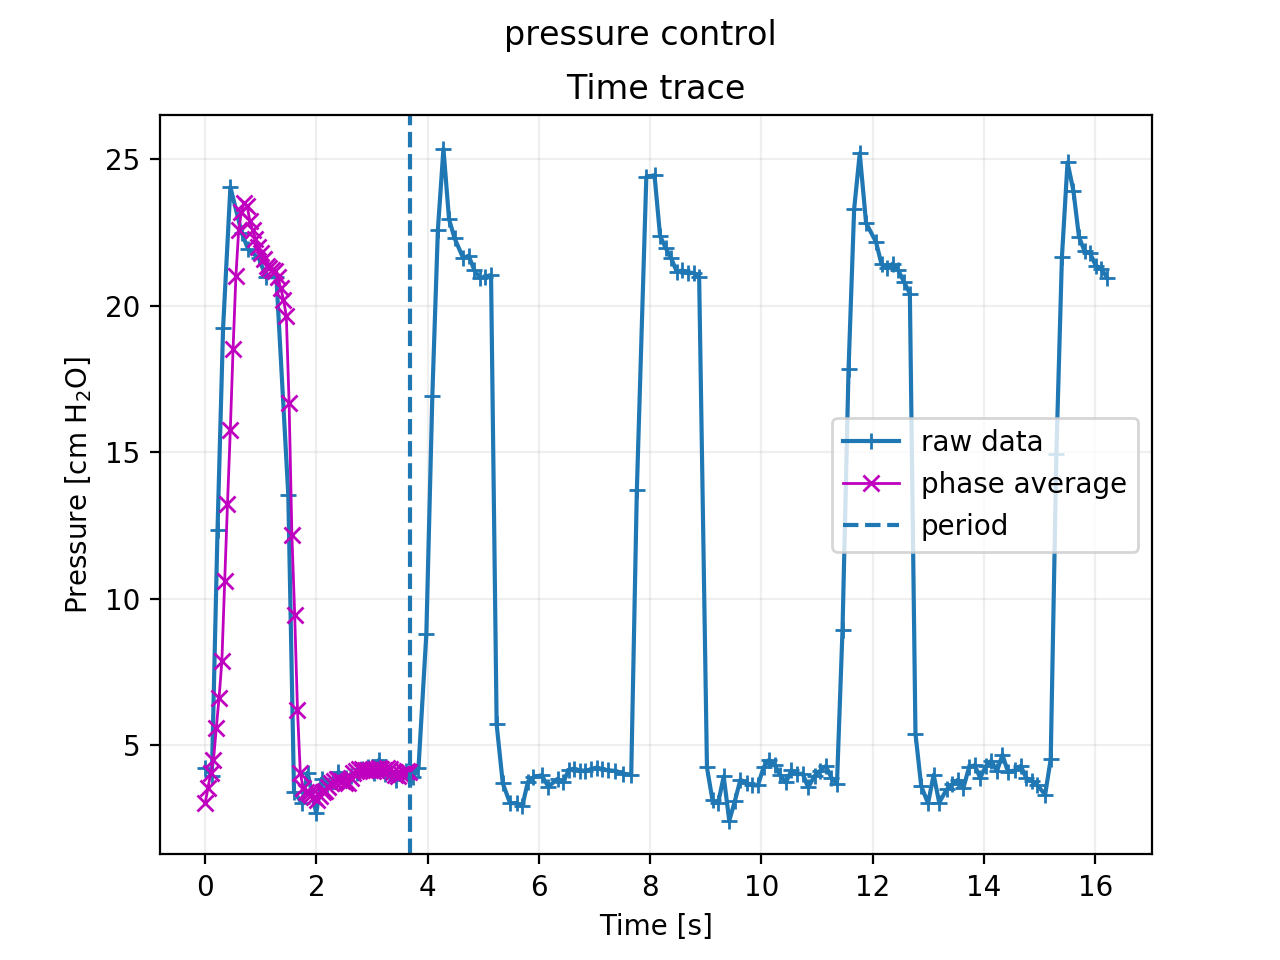

<IPython.core.display.Javascript object>


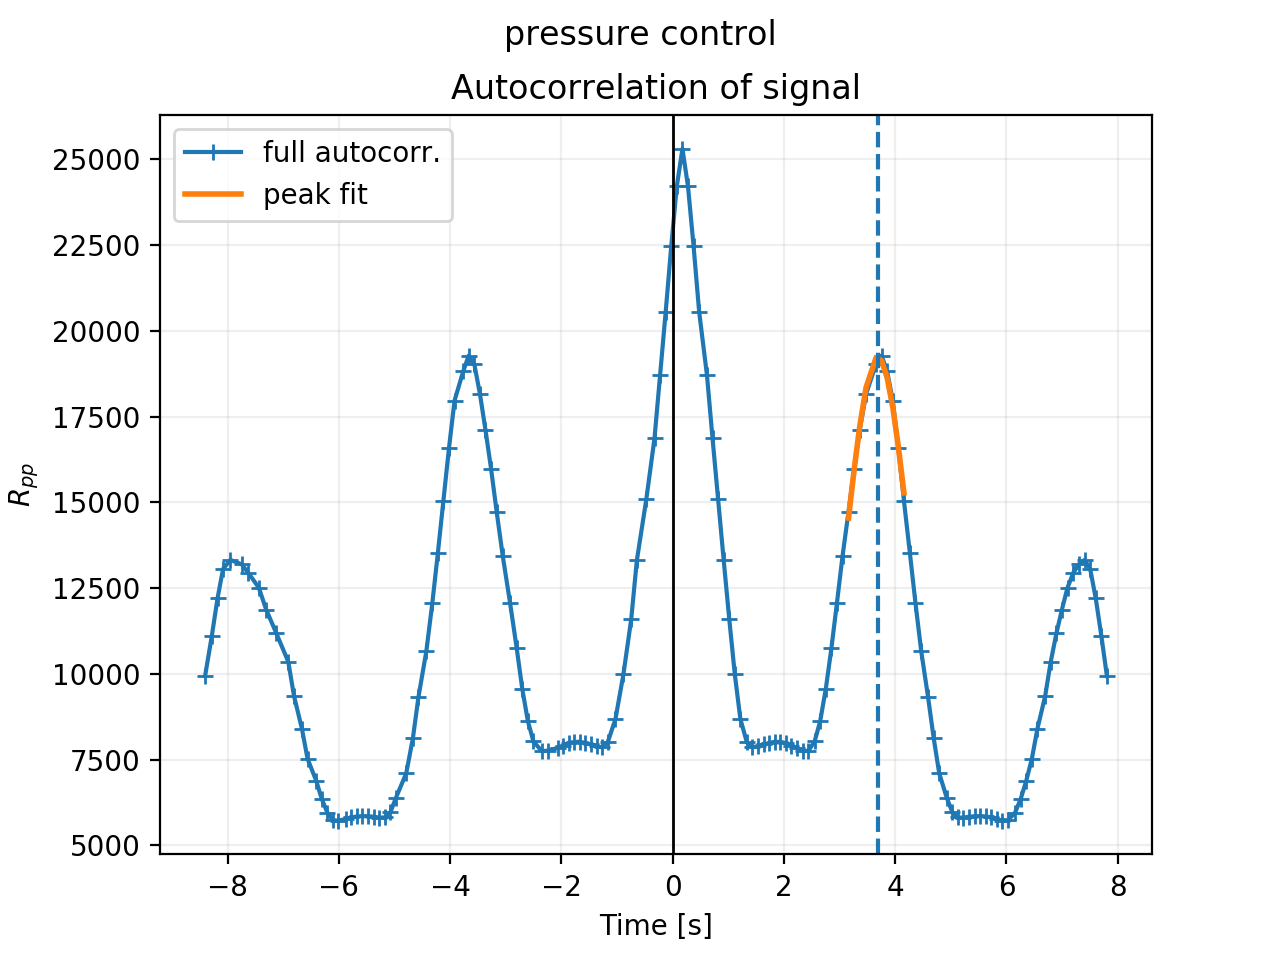

In [67]:
pc_result = process_data( pressure_control_data, "pressure control", "inlet_pressure_pc" )

delta-t = 0.100470 +- 0.013099 seconds
Repeating period =  3.7460216154573245 seconds
Wrote inlet_pressure_vc .


<IPython.core.display.Javascript object>


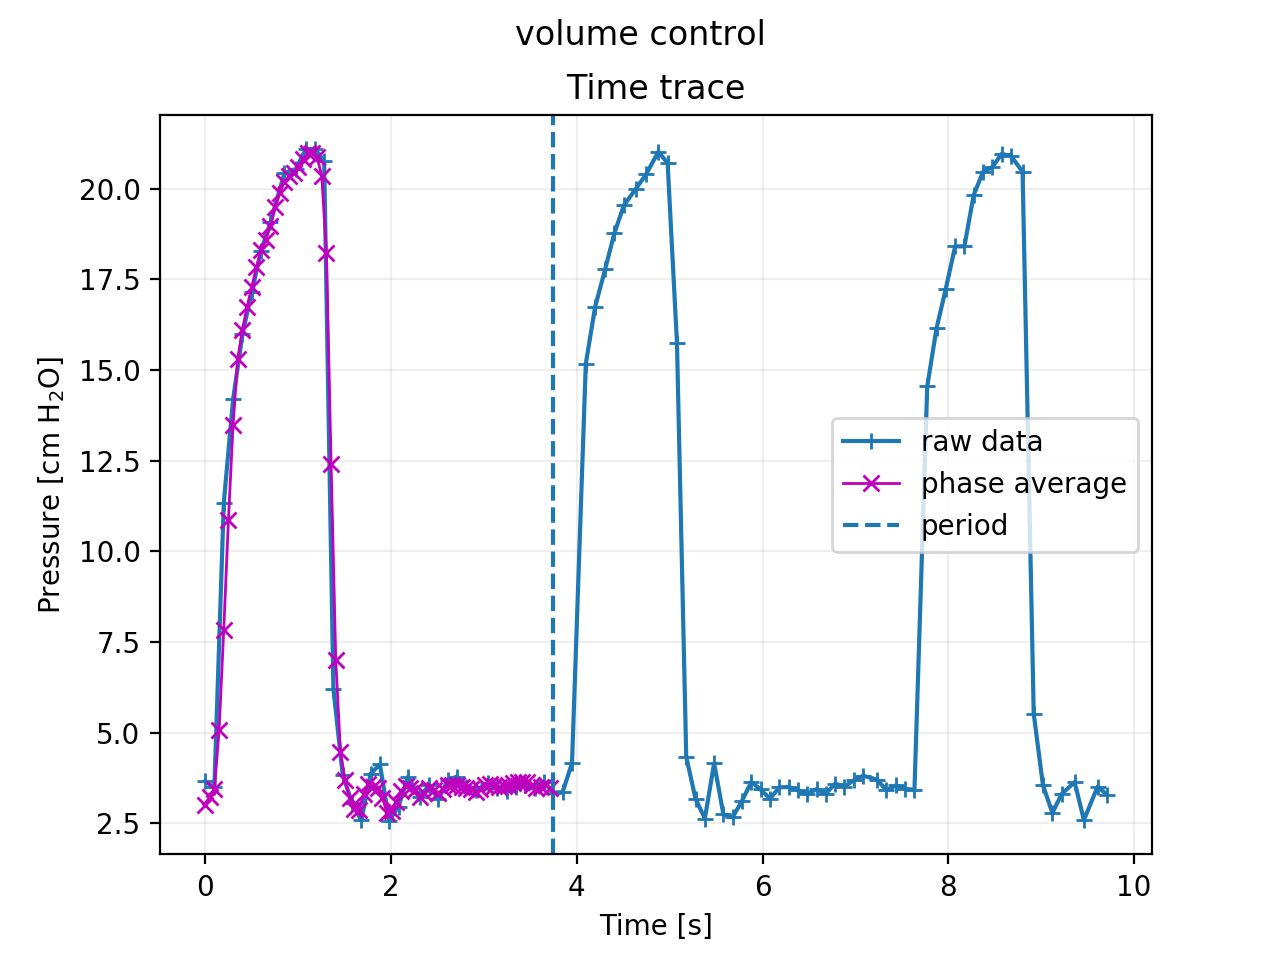

<IPython.core.display.Javascript object>


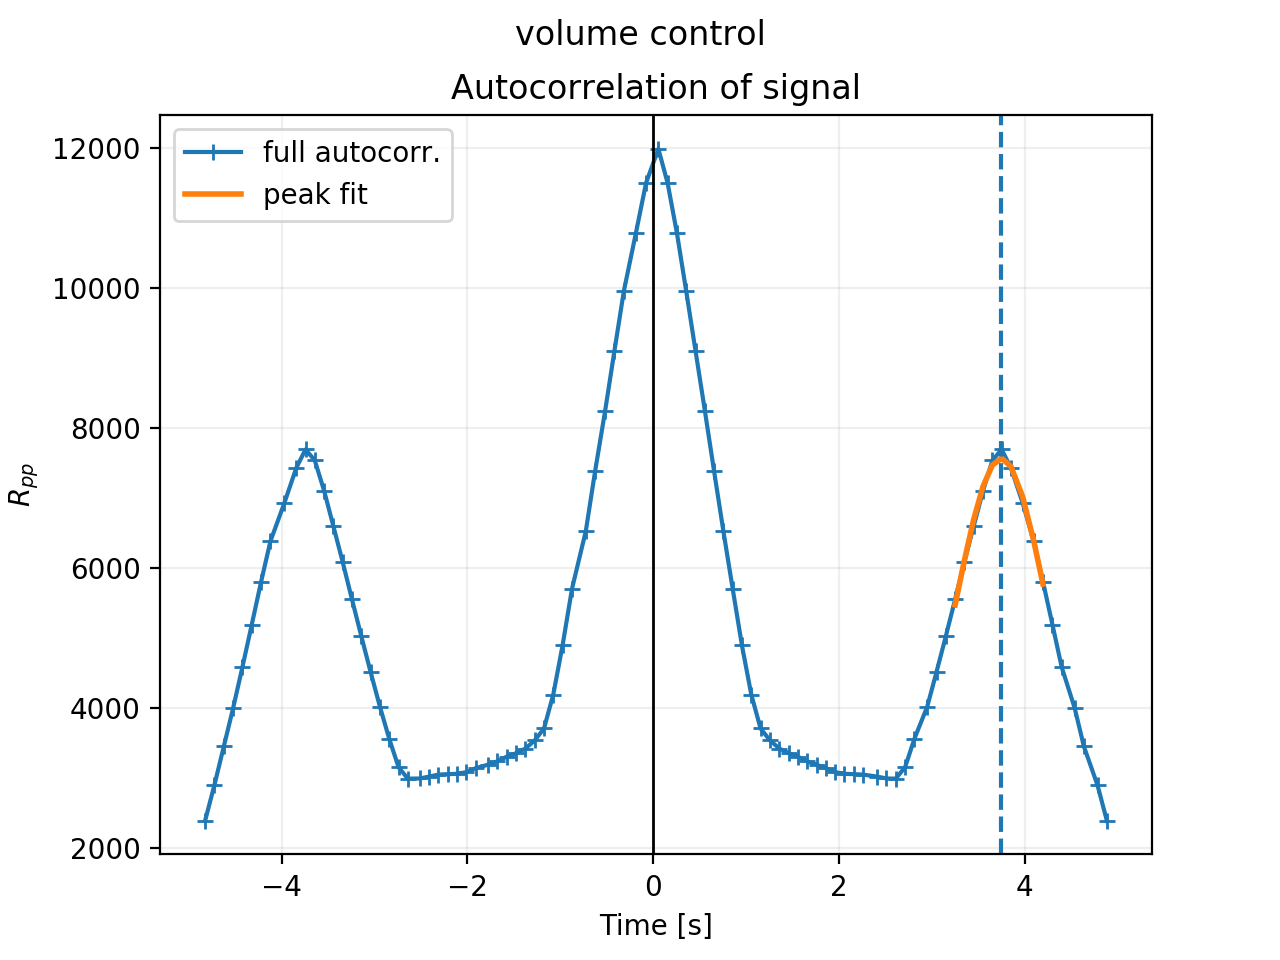

In [68]:
vc_result = process_data( volume_control_data, "volume control", "inlet_pressure_vc" )

In [ ]:
# Plot both together
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
if title is not None: plt.suptitle(title)
plt.title("Final result - phase averaged signal")
plt.ylabel('Pressure [cm H$_2$O]')
plt.xlabel('Time [s]')
ax.plot(pc_result[0, result,marker='o')